In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import os
from tqdm import tqdm
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.models import Sequential
import keras
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array

In [16]:
path='C:/Users/user/Desktop/Age and Gender/super_resol_data/Humans'

def images_upload(path):
    images=[]
    for root,subfolders,files in os.walk(path):
        for file in tqdm(files):
            filename=root+os.sep+file
            if filename.endswith('jpg') or filename.endswith('png'):
                images.append(filename)
    return images
images=images_upload(path)

100%|█████████████████████████████████████████████████████████████████████████| 7219/7219 [00:00<00:00, 2410147.30it/s]


In [5]:
HSIZE =256
LSIZE =64

In [17]:
def convert_high_image_labels(images):
    high_labels=[]
    j=0
    for i in tqdm(images):
        if(j==6000):
            break
        i = cv2.imread(i)
        i=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        res_i=cv2.resize(i,(HSIZE,HSIZE))
        res_i = res_i.astype('float32') / 255.0

        del i
        high_labels.append(img_to_array(res_i))
        j = j+1
    return high_labels
high_labels = convert_high_image_labels(images)

 84%|█████████████████████████████████████████████████████████████████▋            | 6000/7123 [02:15<00:25, 44.20it/s]


In [18]:
def convert_low_image_labels(images):
    low_labels=[]
    j=0
    for i in tqdm(images):
        if(j==6000):
            break
        i = cv2.imread(i)
        i=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        res_i=cv2.resize(i,(LSIZE,LSIZE))
        res_i = res_i.astype('float32') / 255.0
        del i
        j= j+1
        low_labels.append(img_to_array(res_i))
    return low_labels
low_labels = convert_low_image_labels(images)

 84%|█████████████████████████████████████████████████████████████████▋            | 6000/7123 [01:52<00:20, 53.49it/s]


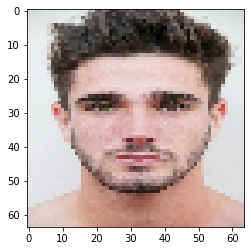

In [6]:
low_labels[0].shape
plt.imshow(low_labels[0])

In [14]:

from keras import layers
def down(filters , kernel_low_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_low_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_low_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_low_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample

def model():
    inputs = layers.Input(shape= [LSIZE,LSIZE,3])
    print(inputs.shape)
    d1 = down(128,(3,3),False)(inputs)
    print(d1.shape)
    d2 = down(128,(3,3),False)(d1)
    print(d2.shape)
    d3 = down(256,(3,3),True)(d2)
    print(d3.shape)
#     d4 = down(512,(3,3),True)(d3)
#     print(d4.shape,"d4")
    
# #     d5 = down(512,(3,3),True)(d4)
# #     print(d5.shape)
# #     #upsampling
# #     u1 = up(512,(3,3),False)(d5)
# #     print(u1.shape)
# #     u1 = layers.concatenate([u1,d4])
#     u2 = up(256,(3,3),False)(d4)
#     print(u2.shape,"u2")
#     u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(d3)
    print(u3.shape,"u3")
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(128,(3,3),False)(u4)
    u6 = up(64,(3,3),False)(u5)
    u7 = up(3,(3,3),False)(u6)
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u7)
    return tf.keras.Model(inputs=inputs, outputs=output)

model = model()
model.summary()

(None, 64, 64, 3)
(None, 32, 32, 128)
(None, 16, 16, 128)
(None, 8, 8, 256)
(None, 16, 16, 128) u3
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 sequential_50 (Sequential)     (None, 32, 32, 128)  3584        ['input_9[0][0]']                
                                                                                                  
 sequential_51 (Sequential)     (None, 16, 16, 128)  147584      ['sequential_50[0][0]']          
                                                                                                  
 sequential_52 (Sequential)     (None, 8, 8, 256)    296192      ['sequential_51[0][0]']    

In [1]:
len(high_labels)

NameError: name 'high_labels' is not defined

In [19]:

train_high_image = high_labels[:5000]
train_low_image = low_labels[:5000]
validation_high_image = high_labels[5000:]
validation_low_image = low_labels[5000:]

# train_high_image = np.reshape(train_high_image,(len(train_high_image),HSIZE,HSIZE,3))
# train_low_image = np.reshape(train_low_image,(len(train_low_image),LSIZE,LSIZE,3))


# validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),HSIZE,HSIZE,3))
# validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),LSIZE,LSIZE,3))


# test_high_image = high_labels[6500:]
# test_low_image = low_labels[6500:]
# test_high_image= np.reshape(test_high_image,(len(test_high_image),HSIZE,HSIZE,3))
# test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

# print("Shape of training images:",train_high_image.shape)
# # print("Shape of test images:",test_high_image.shape)
# print("Shape of validation images:",validation_high_image.shape)

In [20]:
high_labels.clear()
low_labels.clear()

In [23]:

train_high_image = np.reshape(train_high_image[:5000],(5000,HSIZE,HSIZE,3))
train_low_image = np.reshape(train_low_image[:5000],(5000,LSIZE,LSIZE,3))


validation_high_image= np.reshape(validation_high_image[:1000],(1000,HSIZE,HSIZE,3))
validation_low_image = np.reshape(validation_low_image[:1000],(1000,LSIZE,LSIZE,3))


In [22]:
print(train_high_image.shape)
print(train_low_image.shape)
print(validation_high_image.shape)
print(validation_low_image.shape)

(5000, 256, 256, 3)
(5000, 64, 64, 3)
(1000, 256, 256, 3)
(1000, 64, 64, 3)


In [25]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])
H =model.fit(train_low_image, train_high_image, epochs = 10, batch_size = 1,
          validation_data = (validation_low_image,validation_high_image))

Epoch 1/10
5000/5000 [==============================] - 222s 44ms/step - loss: 0.0328 - acc: 0.8033 - val_loss: 0.0278 - val_acc: 0.8894
Epoch 2/10
5000/5000 [==============================] - 223s 45ms/step - loss: 0.0312 - acc: 0.8129 - val_loss: 0.0315 - val_acc: 0.8786
Epoch 3/10
5000/5000 [==============================] - 221s 44ms/step - loss: 0.0301 - acc: 0.8140 - val_loss: 0.0297 - val_acc: 0.8793
Epoch 4/10
5000/5000 [==============================] - 221s 44ms/step - loss: 0.0291 - acc: 0.8203 - val_loss: 0.0305 - val_acc: 0.9163
Epoch 5/10
5000/5000 [==============================] - 222s 44ms/step - loss: 0.0284 - acc: 0.8218 - val_loss: 0.0270 - val_acc: 0.9120
Epoch 6/10
5000/5000 [==============================] - 219s 44ms/step - loss: 0.0281 - acc: 0.8222 - val_loss: 0.0263 - val_acc: 0.9243
Epoch 7/10
5000/5000 [==============================] - 221s 44ms/step - loss: 0.0278 - acc: 0.8247 - val_loss: 0.0256 - val_acc: 0.9117
Epoch 8/10
5000/5000 [===================

In [26]:
new_low_images = model.predict(train_low_image)

157/157 [==============================] - 51s 325ms/step


In [27]:
new_validation_low_image = model.predict(validation_low_image)

32/32 [==============================] - 11s 324ms/step


In [28]:

def second_model():
    inputs = layers.Input(shape= [HSIZE,HSIZE,3])
    print(inputs.shape)
    d1 = down(128,(3,3),False)(inputs)
    print(d1.shape)
    d2 = down(128,(3,3),False)(d1)
    print(d2.shape)
    d3 = down(256,(3,3),True)(d2)
    print(d3.shape)
    d4 = down(512,(3,3),True)(d3)
    print(d4.shape)
    
#     d5 = down(512,(3,3),True)(d4)
#     print(d5.shape)
#     #upsampling
#     u1 = up(512,(3,3),False)(d5)
#     print(u1.shape)
#     u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),False)(d4)
    print(u2.shape)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    print(u3.shape)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u5)
    return tf.keras.Model(inputs=inputs, outputs=output)

smodel = second_model()
smodel.summary()

(None, 256, 256, 3)
(None, 128, 128, 128)
(None, 64, 64, 128)
(None, 32, 32, 256)
(None, 16, 16, 512)
(None, 32, 32, 256)
(None, 64, 64, 128)
Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_66 (Sequential)     (None, 128, 128, 12  3584        ['input_11[0][0]']               
                                8)                                                                
                                                                                                  
 sequential_67 (Sequential)     (None, 64, 64, 12

In [29]:
smodel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])
h= smodel.fit(new_low_images, train_high_image, epochs = 7, batch_size = 1,
          validation_data = (new_validation_low_image,validation_high_image))

Epoch 1/7
5000/5000 [==============================] - 1208s 241ms/step - loss: 0.0345 - acc: 0.7871 - val_loss: 0.0263 - val_acc: 0.9099
Epoch 2/7
5000/5000 [==============================] - 699s 140ms/step - loss: 0.0282 - acc: 0.8143 - val_loss: 0.0256 - val_acc: 0.9309
Epoch 3/7
5000/5000 [==============================] - 678s 136ms/step - loss: 0.0269 - acc: 0.8166 - val_loss: 0.0252 - val_acc: 0.9182
Epoch 4/7
5000/5000 [==============================] - 759s 152ms/step - loss: 0.0262 - acc: 0.8214 - val_loss: 0.0259 - val_acc: 0.9263
Epoch 5/7
5000/5000 [==============================] - 678s 136ms/step - loss: 0.0259 - acc: 0.8243 - val_loss: 0.0252 - val_acc: 0.9129
Epoch 6/7
5000/5000 [==============================] - 681s 136ms/step - loss: 0.0255 - acc: 0.8254 - val_loss: 0.0254 - val_acc: 0.8908
Epoch 7/7
5000/5000 [==============================] - 677s 135ms/step - loss: 0.0251 - acc: 0.8269 - val_loss: 0.0253 - val_acc: 0.9401


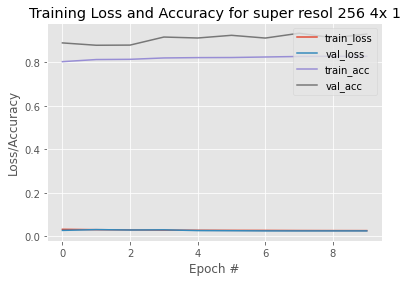

In [31]:
plt.style.use("ggplot")
plt.figure()
N = 10
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy for super resol 256 4x 1")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('super resol 256 1x 1.png')

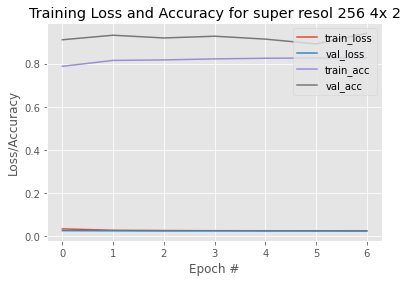

In [32]:
plt.style.use("ggplot")
plt.figure()
N = 7
plt.plot(np.arange(0,N), h.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), h.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), h.history["acc"], label="train_acc")
plt.plot(np.arange(0,N), h.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy for super resol 256 4x 2")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('super resol 256 1x 2.png')

1/1 [==============================] - 0s 146ms/step


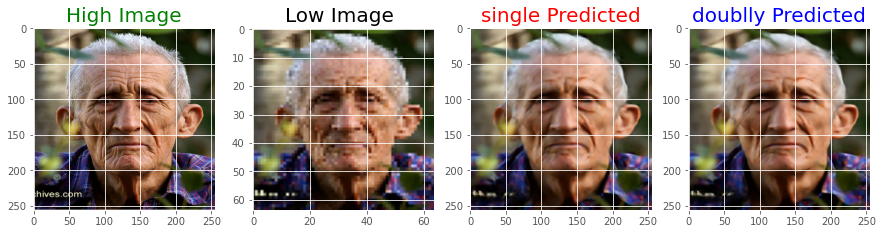

1/1 [==============================] - 0s 52ms/step


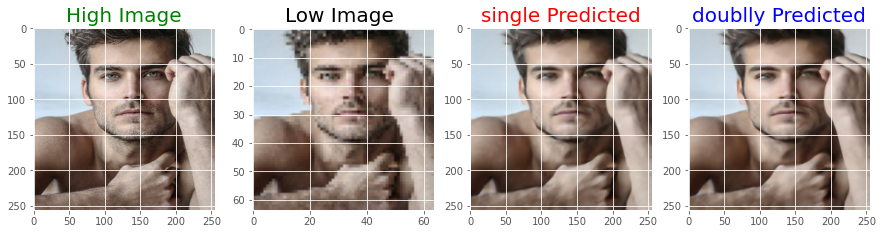

1/1 [==============================] - 0s 49ms/step


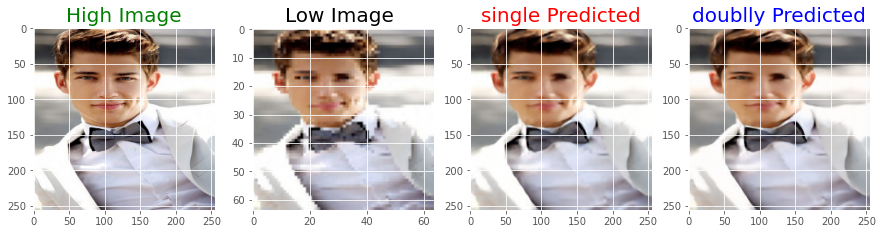

1/1 [==============================] - 0s 48ms/step


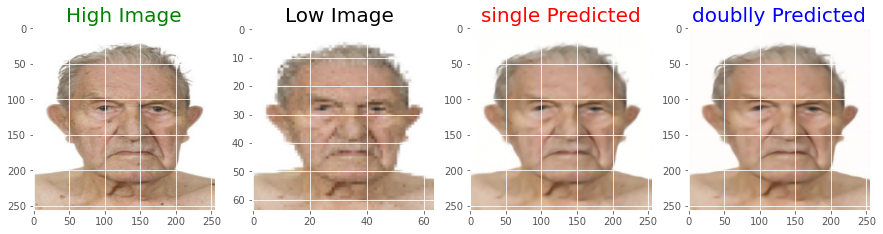

1/1 [==============================] - 0s 47ms/step


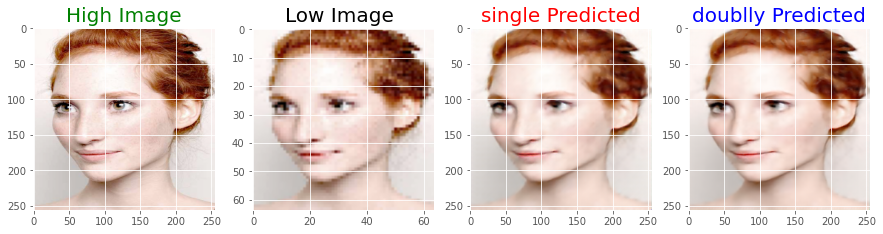

1/1 [==============================] - 0s 55ms/step


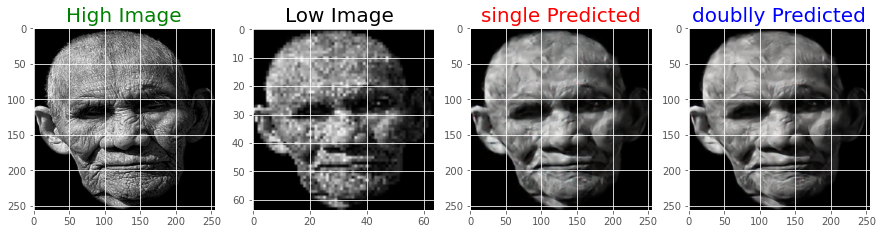

1/1 [==============================] - 0s 46ms/step


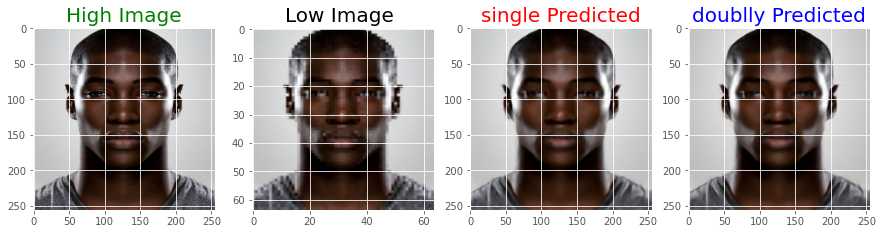

1/1 [==============================] - 0s 60ms/step


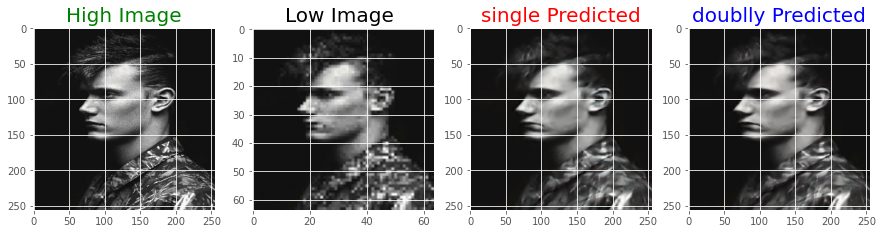

1/1 [==============================] - 0s 65ms/step


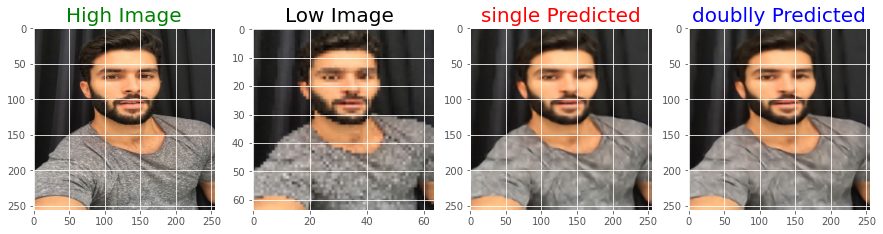

In [33]:
def plot_images(high,low,predicted1,predicted2):
    plt.figure(figsize=(15,15))
    plt.subplot(1,4,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,4,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,4,3)
    plt.title('single Predicted', color = 'Red', fontsize = 20)
    plt.imshow(predicted1)
    plt.subplot(1,4,4)
    plt.title('doublly Predicted', color = 'blue', fontsize = 20)
    plt.imshow(predicted2)
    
    plt.show()

for i in range(1,10):
    
    predicted1 = np.clip(model.predict(train_low_image[i].reshape(1,LSIZE, LSIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)
    predicted2 = np.clip(smodel.predict(predicted1.reshape(1,HSIZE, HSIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)
    
    plot_images(train_high_image[i],train_low_image[i],predicted1,predicted2)

In [34]:
model.save("high_resol1_256_1x.model")
smodel.save("high_resol2_256_1x.model")

INFO:tensorflow:Assets written to: high_resol1_256_1x.model\assets


INFO:tensorflow:Assets written to: high_resol1_256_1x.model\assets


INFO:tensorflow:Assets written to: high_resol2_256_1x.model\assets


INFO:tensorflow:Assets written to: high_resol2_256_1x.model\assets
